In [45]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [1]:
from sklearn.datasets import load_breast_cancer
df2 = load_breast_cancer()

### Exercício 2

In [16]:
df_steel = pd.read_csv('faults.csv')

In [17]:
df_steel.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [18]:
targets = df_steel.iloc[:, 27:]
df_steel.drop(targets.columns, axis=1, inplace=True) # this will drop the all the defects column
df_steel['Target'] = targets.idxmax(1) #this will add a 'Target' column to our dataset describing which record has a particular defect.
df_steel.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Target
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry


In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_steel.drop('Target', axis=1), df_steel['Target'], test_size = 0.2)

In [35]:
steps = [("std_scaler", StandardScaler()),("dtc", DecisionTreeClassifier())]

pipe = Pipeline(steps=steps)

spliter = StratifiedKFold(n_splits = 10, shuffle = True, random_state=42)

param_grid ={ 'dtc__criterion' : ['gini','entropy'],
             'dtc__splitter' : ["best", "random"],
             "dtc__max_depth" : range(3,11) 
}

grid_dtc = GridSearchCV(
                        estimator = pipe,
                        param_grid=param_grid,
                        scoring="accuracy",
                        cv = spliter,
                        verbose=0
)

grid_dtc.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('dtc', DecisionTreeClassifier())]),
             param_grid={'dtc__criterion': ['gini', 'entropy'],
                         'dtc__max_depth': range(3, 11),
                         'dtc__splitter': ['best', 'random']},
             scoring='accuracy')

In [36]:
grid_dtc.best_params_

{'dtc__criterion': 'entropy', 'dtc__max_depth': 9, 'dtc__splitter': 'best'}

In [37]:
y_pred = grid_dtc.predict(X_test)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bumps       0.58      0.64      0.61        83
   Dirtiness       0.64      0.50      0.56        14
    K_Scatch       0.91      0.96      0.93        74
Other_Faults       0.63      0.55      0.59       125
      Pastry       0.56      0.72      0.63        32
      Stains       0.75      0.94      0.83        16
   Z_Scratch       0.95      0.78      0.85        45

    accuracy                           0.70       389
   macro avg       0.72      0.73      0.71       389
weighted avg       0.71      0.70      0.70       389



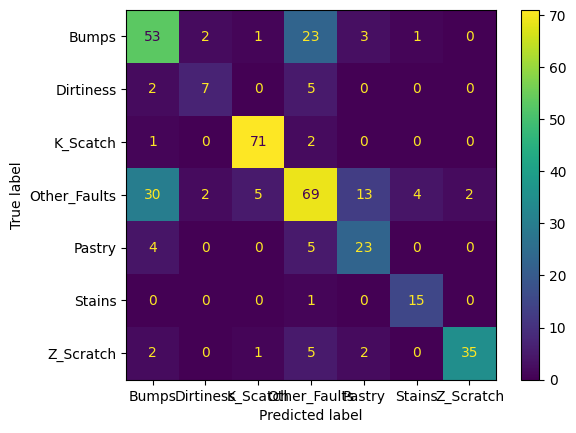

In [42]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [47]:
modelo = grid_dtc.best_estimator_["dtc"]
nome_variaveis = X_train.columns
nome_classes = y_train.unique().astype(str)

plt.figure(figsize=(50,50), dpi=500)

plot_tree(modelo, feature_names=nome_variaveis, class_names=modelo.classes_, filled=True)
plt.savefig("arvore.png")
plt.close()